# Recap: Deep Graph Encoder
- 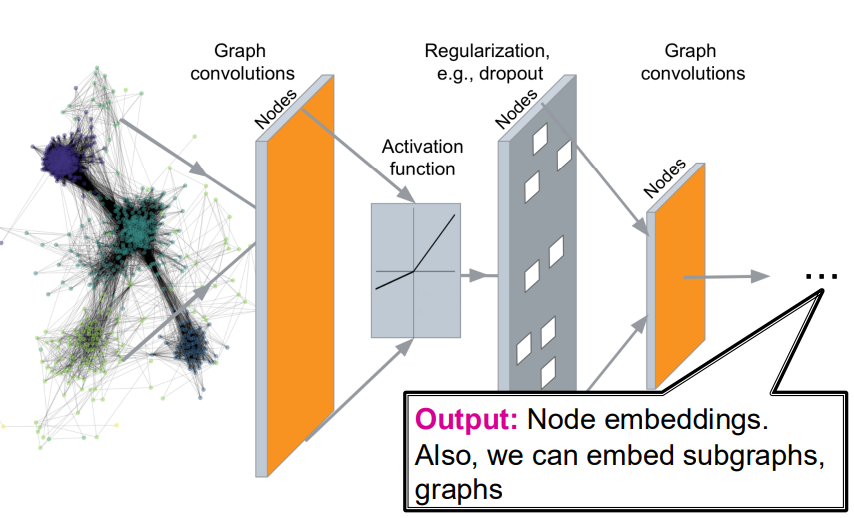
- Idea: Node's neighborhood defines a computation graph
- 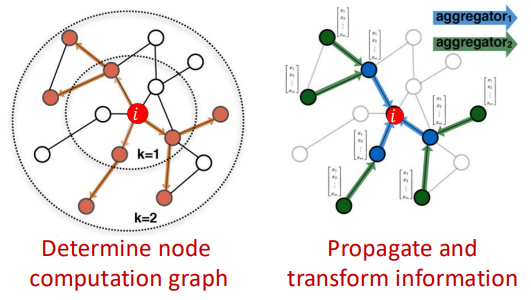
- Learn how to propagate information across the graph to compute node features

## Aggregate From Neighbors:
- Intuition: Nodes aggregate information from their neighbors using neural networks
- 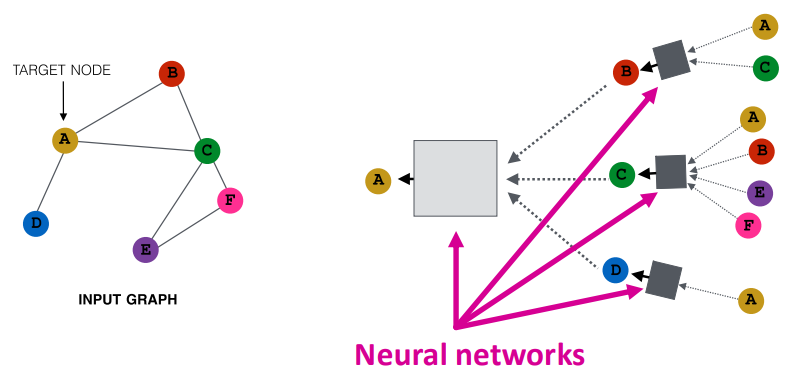
- Intuition: Network neighborhood defines a computation graph
- Every node defines a computation graph based on its neighborhood
- 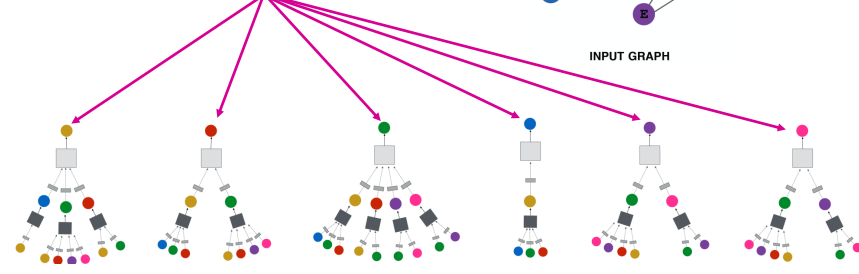

# A General GNN Framework
- 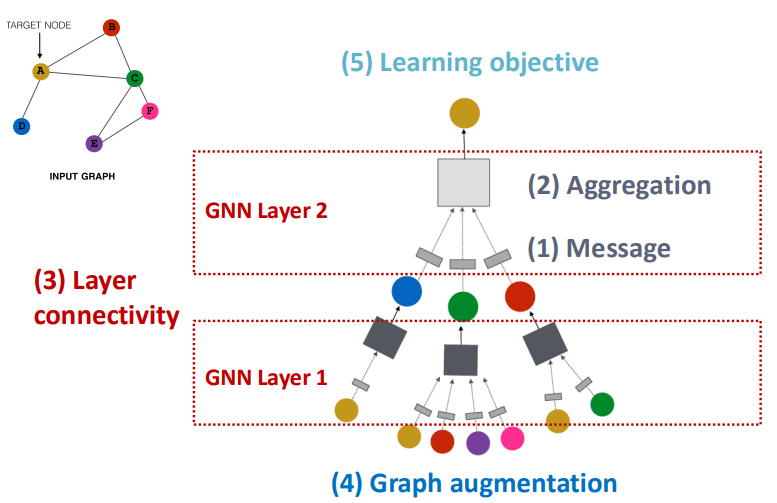
1. GNN layer = Message + Aggregation
    - Different instantiations under this perspective
    - GCN, GraphSAGE, GAT,...
2. Connect GNN layers into a GNN
    - Stack layers sequentially
    - Ways of adding skip connections
3. Idea: Raw input graph != computational graph
    - Graph feature augmentation
    - Graph structure augmentation

- How do we tran a GNN
    - Supervised / unsupervised objectives
    - Node / edge / graph level objectives

# Single Layer of a GNN
- GNN layer = Message + Aggregation
    - Different instantiatios under this perspective
    - GCN, GraphSAGE, GAT, ...
    - 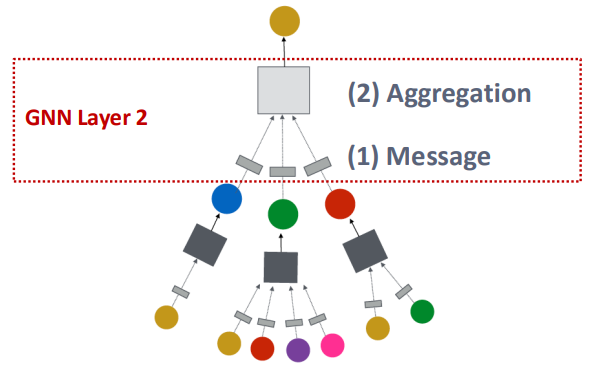
- Idea of a GNN layer
    - Compress a set of vectors into a single vector
    - Two-step process: 1. Message 2. Aggregation
    - 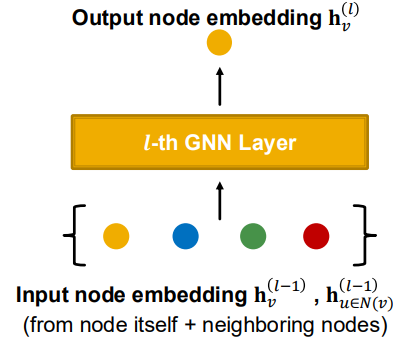

## Message Computation
- Message function
    - 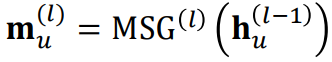
- Intuition: Each node will create a message, which will be sent to other nodes later.
- Example: A linear layer
    - 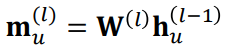
    - Multiply node features with weight matrix W^(l)
    - 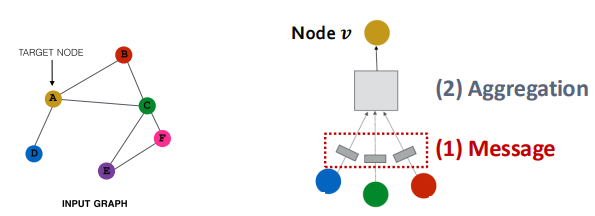

## Message Aggregation
- Intuition: Node v will aggregate the messages from its neighbors u:
    - 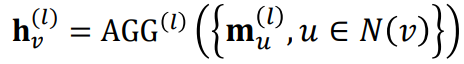
- Example: Sum(.), Mean(.) or Max(.) aggregator
    - 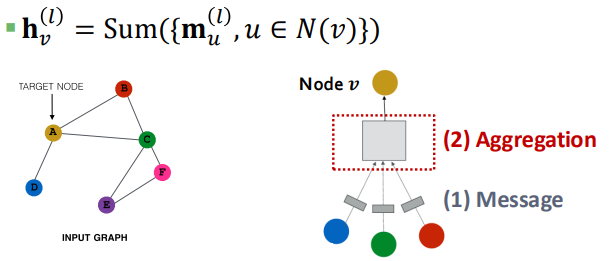

## Message Aggregation: Issue
- Issue: Information from node v itself could get lost
    - Computation of h(l)_v does not directly depends on h(l-1)_v
- Solution: Include h(l-1)_v when computing h(l)_v
    1. Message: compute message from node v itself
        - Usually, a different message computation will performed
        - 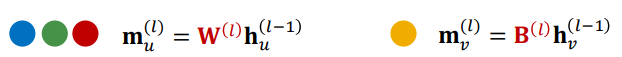
    2. Aggregation: After aggregating from neighbors, we can aggregate the message from  node v itself.
        - Via concatenation or summation
        - 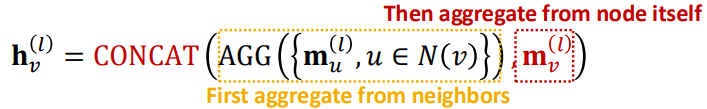

## A Single GNN layer
- Putting things together
    1. Message: Each node computes a message
        - 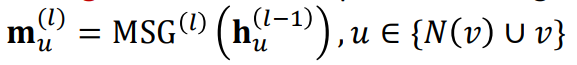
    3. Aggregation: aggregate messages from neighbors
        - 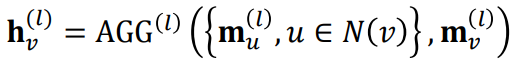
- Nonlinearity (activation): Adds expressiveness
    - Often written as sigmoid, examples: ReLU, sigmoid
    - Can be added to message or aggregation

## Activation (Non-Linearity)
- Apply activation to ith dimension of embedding x
    1. Rectified Linear unit (ReLU)
        - ReLU(x_i) = max(x_i, 0)
        - 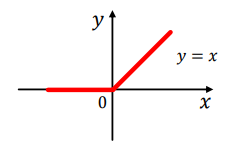
        - most commonly used
    2. sigmoid
        - 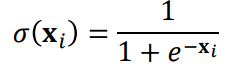
        - Used only when we want to restrcit the range of our embeddings
        - 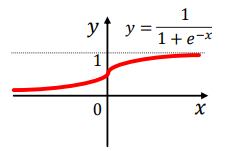
    3. Parametric ReLU
        - PReLU(x_i) = max(x_i, 0) + a_imin(x+i, 0)
        - a_i is a trainable parameter
        - 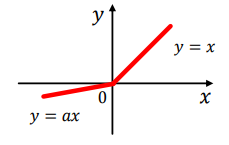
        - Empirically performs better than ReLU

## Classific GNN layers
1. Graph Convolutional Networks (GCN)
    - Message + Aggregation
    - 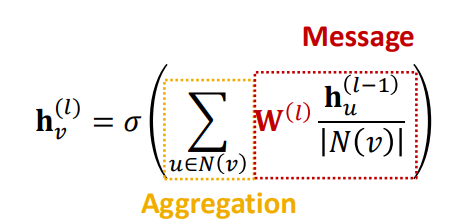
    - Message:
        - Each neighbor: 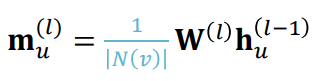
    - Aggregation
        - Sum over messages from neighbors, then apply activation
        - 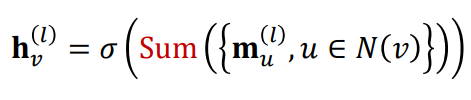
    - In GCN the input graph is assumed to have self-edges that are included in the summation

2. GraphSAGE
- 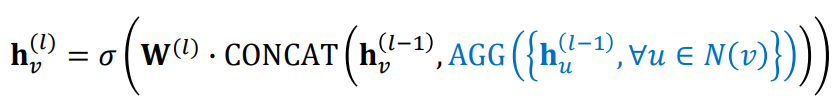
- Two-stage aggregation
    - Stage 1: Aggregate from node neighbors
        -  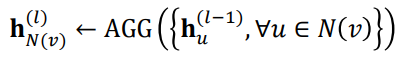
    - Stage 2: Further aggregate over the node itself.
        - 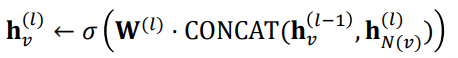
    - Message is computed within the AGG(.)

#### GraphSAGE neighbor aggregation
- Mean: Take a weighted average of neighbors
    - 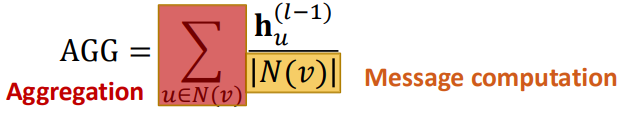
- Pool: Transform neighbor vectors and apply symmetric vector function Mean(.) or Max(.)
    - 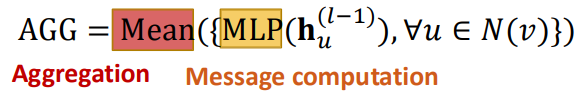
- LSTM: Apply LSTM to reshuffled to neighbors
    - 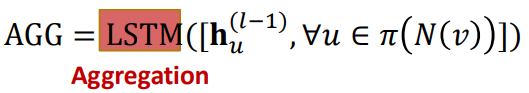

#### GraphSAGE: L2 Normalization
- Optional: apply l2 normalization to h(l)_v at every layer
- 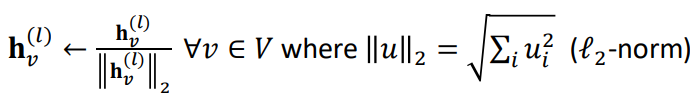
- Without l2 normalization, the embedding vectors have diffeent scales for vectors
- In some cases, normalization of embedding results in performance improvement
- After l2 normalization, all vectors will have the same l2 norm.

3. Graph Attention Networks
- 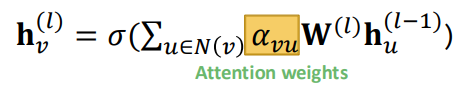
- In GCN / GraphSAGE
    - 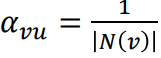 is the weighting factor (importance) of node u's message to node v
    - alpha_vu is defined explicitly based on the structural properties of the graph (node degree)
    - All neighbors u E N(v) are equally important to node v
- Not all node's neighbors are equally important
    - Attention is inspired by cognitive attention
    - The attention alpha_uv focuses on the important parts of the input data and faded out the rest.
            - Idea: The NN should devote more computing power on the small but important part of the data
            - Which part of the data is more important depends on the context and is learned through training.